## Install necessary libraries

In [1]:
!pip install roboflow
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo
!pip install -e detectron2

# !wget https://github.com/ayoolaolafenwa/PixelLib/releases/download/0.2.0/pointrend_resnet50.pkl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=4322608081e360dd52e61b1a5471bcd49d5d82d71ae5143cceca57516699b300
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 15069, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 15069 (delta 44), reused 74 (delta 38), pack-reused 14975
Receiving objects: 100% (15069/15069), 6.14 MiB | 14.55 MiB/s, done.
Resolving deltas: 100% (10902/10902), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/detectron2_repo
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata

ERROR: detectron2 is not a valid editable requirement. It should either be a path to a local project or a VCS URL (beginning with bzr+http, bzr+https, bzr+ssh, bzr+sftp, bzr+ftp, bzr+lp, bzr+file, git+http, git+https, git+ssh, git+git, git+file, hg+file, hg+http, hg+https, hg+ssh, hg+static-http, svn+ssh, svn+http, svn+https, svn+svn, svn+file).


## Download Data

All the image preprocessing are done in roboflow.com. Here we just download it.

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="iVTEfmkxCRHKQpQzlsfS")
project = rf.workspace("ali-reza-barghgir-3wr6e").project("instanse-seg-cat-dog")
dataset = project.version(5).download("coco")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Instanse-seg-Cat-&-Dog-5 in coco:: 100%|██████████| 736/736 [00:01<00:00, 608.26it/s]


## Import Libraries

In [2]:
import detectron2, cv2, random
import os
import numpy as np
import torch, torchvision
# from detectron2.utils.logger import setup_logger
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
# from detectron2.config import get_cfg, CfgNode
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

from detectron2.projects.point_rend import add_pointrend_config

## Prepering Train and Validation Dataset

In [3]:
register_coco_instances("poly_train",{},
                        "/content/Instanse-seg-Cat-&-Dog-5/train/_annotations.coco.json", 
                        "/content/Instanse-seg-Cat-&-Dog-5/train")

register_coco_instances("poly_valid", {}, 
                        "/content/Instanse-seg-Cat-&-Dog-5/valid/_annotations.coco.json", 
                        "/content/Instanse-seg-Cat-&-Dog-5/valid")


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



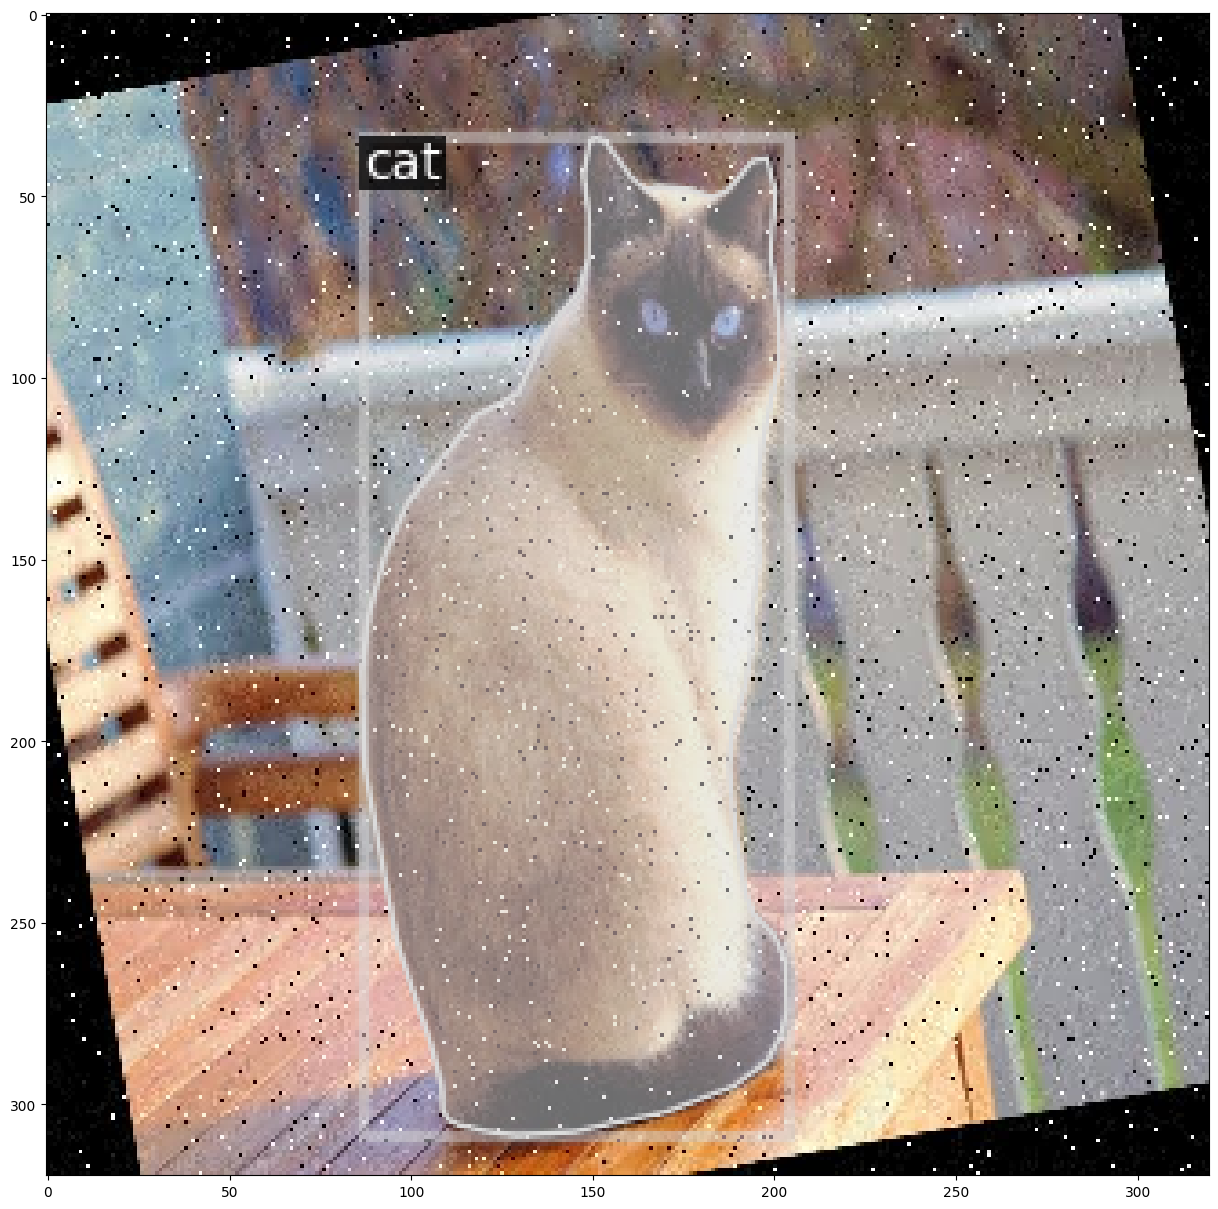

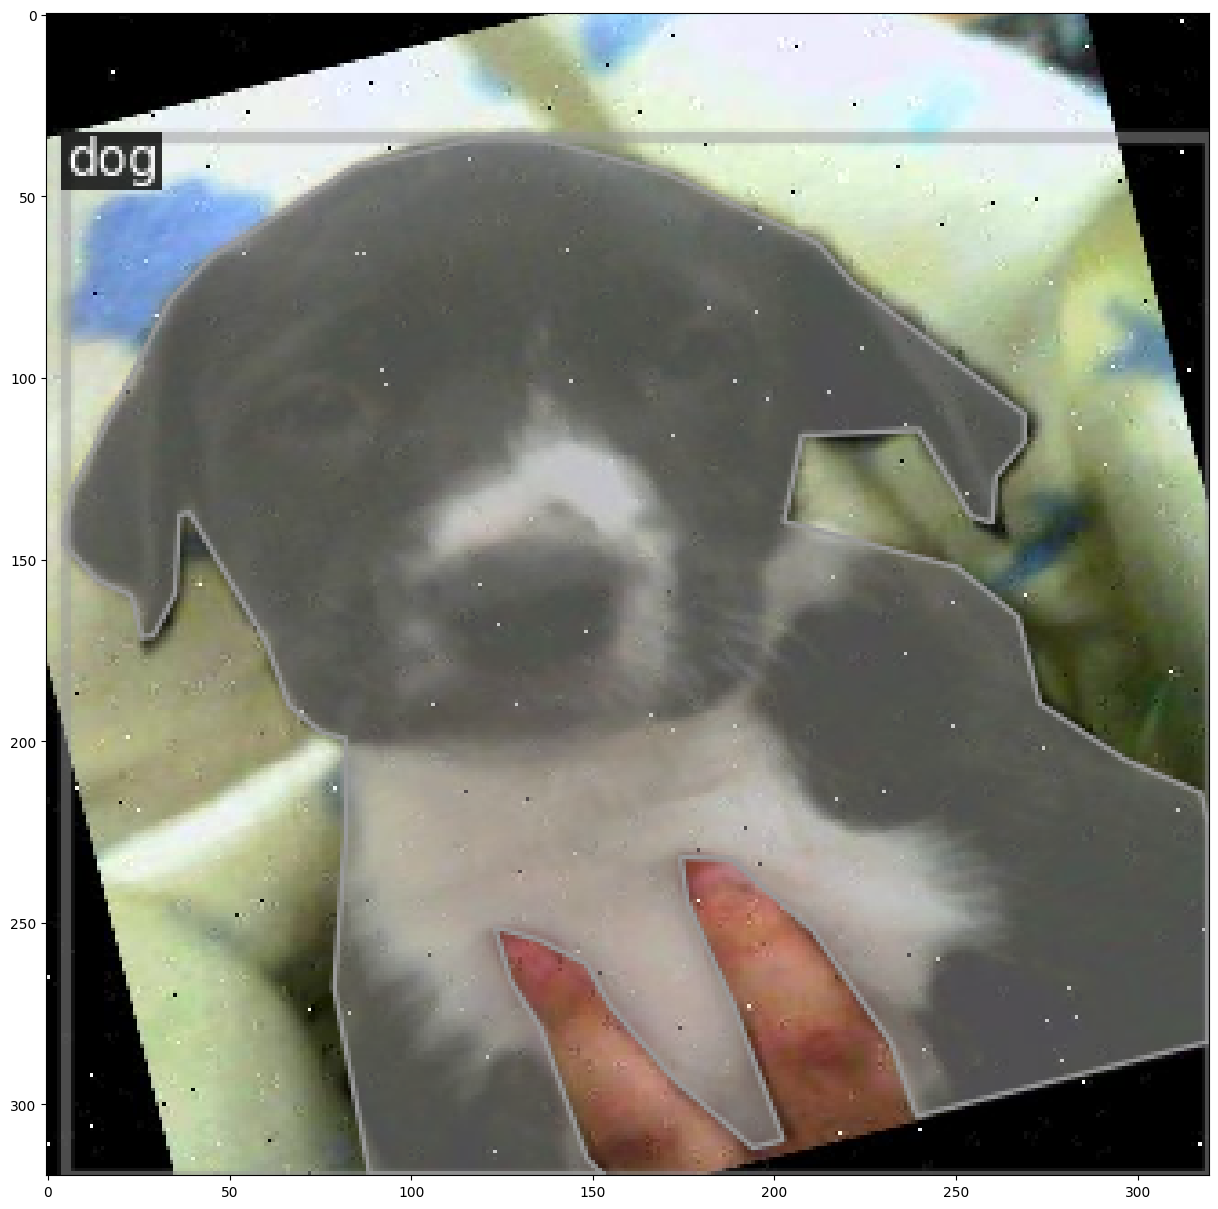

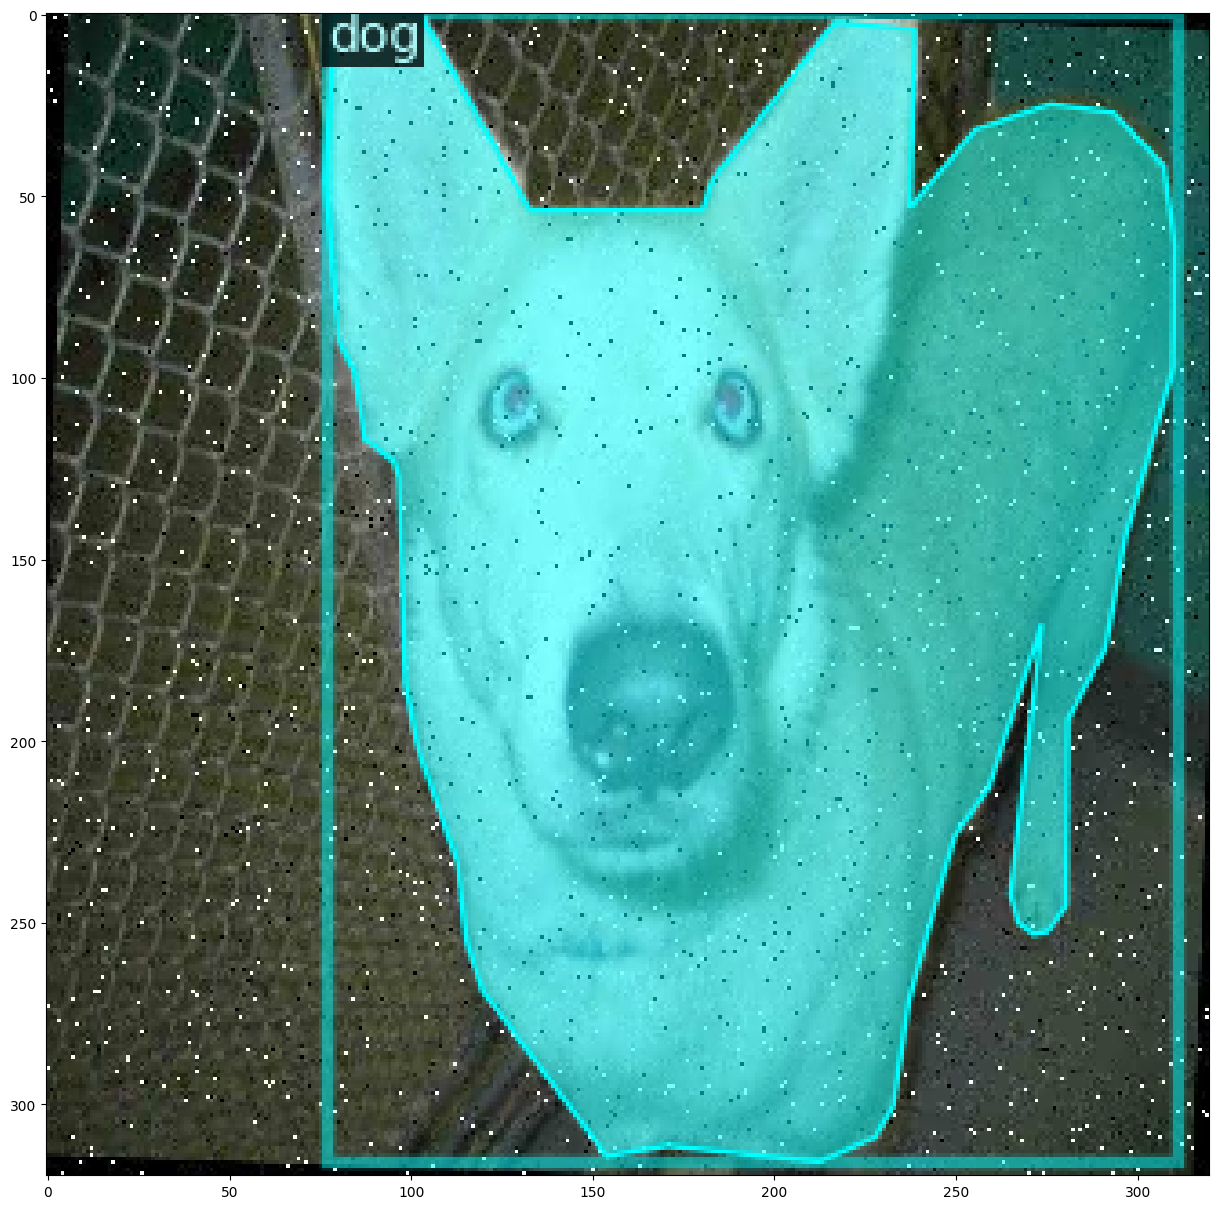

In [4]:
dataset_custom = DatasetCatalog.get("poly_train")
dataset_custom_metadata = MetadataCatalog.get("poly_train")

for s in random.sample(dataset_custom, 3):
    img = cv2.imread(s['file_name'])
    v = Visualizer(img[:, :, ::-1], metadata=dataset_custom_metadata, scale=0.5)
    v = v.draw_dataset_dict(s)
    plt.figure(figsize=(15, 20))
    plt.imshow(v.get_image())
    plt.show()

## Setting model configs and train the model

In [30]:
# Set the training Configs
cfg = get_cfg()
# Add PointRend-specific config
add_pointrend_config(cfg) 
cfg.merge_from_file("detectron2_repo/projects/PointRend/configs/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco.yaml")
cfg.DATASETS.TRAIN = ("poly_train",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2 # The speed of dataload to the ram once at a time.
cfg.MODEL.WEIGHTS = "detectron2://PointRend/InstanceSegmentation/pointrend_rcnn_R_50_FPN_3x_coco/164955410/model_final_edd263.pkl"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0005
cfg.SOLVER.MAX_ITER = 1800    # 600 iterations seems good enough, but you can certainly train longer
# cfg.SOLVER.STEPS = []        # do not decay learning rate
# These two code have to had same number because of assert that make an error
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # only has one class (cat & dog) + 1
cfg.MODEL.POINT_HEAD.NUM_CLASSES = 3 # it seems that I have to assign this attribute because of assert code

cfg.TEST.DETECTIONS_PER_IMAGE = 5

In [31]:
# Trainer
os.makedirs(cfg.OUTPUT_DIR, exist_ok = True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume = False)
trainer.train()


[06/01 17:57:01 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.coarse_head.prediction.{bias, weight}
roi_heads.mask_head.point_head.fc1.weight
roi_heads.mask_head.point_head.fc2.weight
roi_heads.mask_head.point_head.fc3.weight
roi_heads.mask_head.point_head.predictor.{bias, weight}


[06/01 17:57:01 d2.engine.train_loop]: Starting training from iteration 0
[06/01 17:57:10 d2.utils.events]:  eta: 0:11:45  iter: 19  total_loss: 2.943  loss_cls: 1.394  loss_box_reg: 0.1516  loss_mask: 0.6928  loss_mask_point: 0.6957  loss_rpn_cls: 0.004067  loss_rpn_loc: 0.007619    time: 0.4016  last_time: 0.4435  data_time: 0.0256  last_data_time: 0.0077   lr: 9.9905e-06  max_mem: 3307M
[06/01 17:57:18 d2.utils.events]:  eta: 0:11:31  iter: 39  total_loss: 2.575  loss_cls: 1.054  loss_box_reg: 0.1272  loss_mask: 0.6883  loss_mask_point: 0.6773  loss_rpn_cls: 0.003399  loss_rpn_loc: 0.00501    time: 0.3992  last_time: 0.3574  data_time: 0.0105  last_data_time: 0.0267   lr: 1.998e-05  max_mem: 3307M
[06/01 17:57:26 d2.utils.events]:  eta: 0:11:29  iter: 59  total_loss: 2.07  loss_cls: 0.5655  loss_box_reg: 0.1465  loss_mask: 0.6804  loss_mask_point: 0.6601  loss_rpn_cls: 0.003824  loss_rpn_loc: 0.008214    time: 0.4014  last_time: 0.4176  data_time: 0.0133  last_data_time: 0.0071   lr

In [32]:
# Save model for testing
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9   # set the testing threshold for this model
cfg.DATASETS.TEST = ("poly_valid", )
predictor = DefaultPredictor(cfg)

[06/01 18:10:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


## Validating the model

WARNING [06/01 18:10:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/01 18:10:39 d2.data.datasets.coco]: Loaded 55 images in COCO format from /content/Instanse-seg-Cat-&-Dog-5/valid/_annotations.coco.json


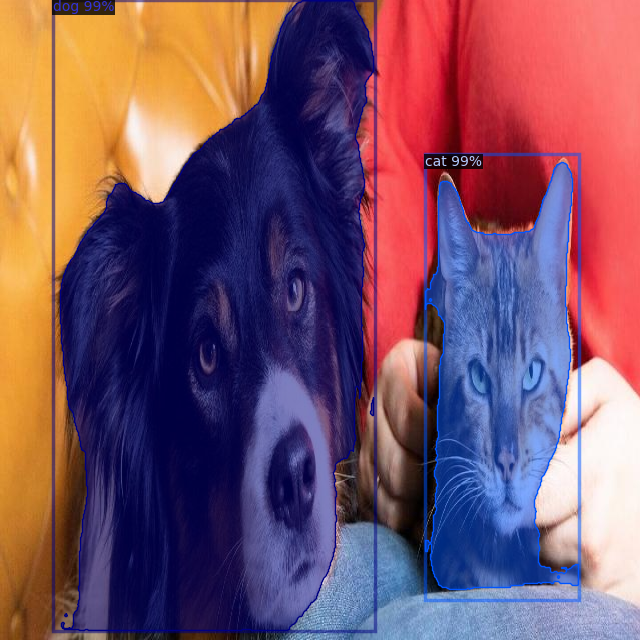

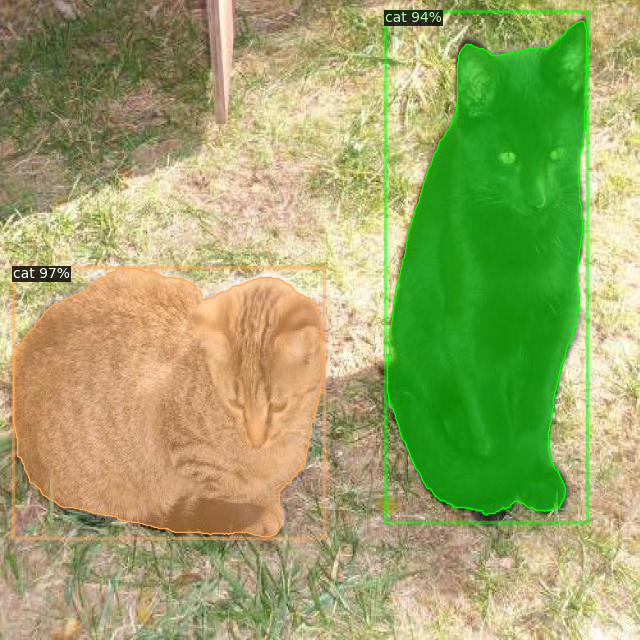

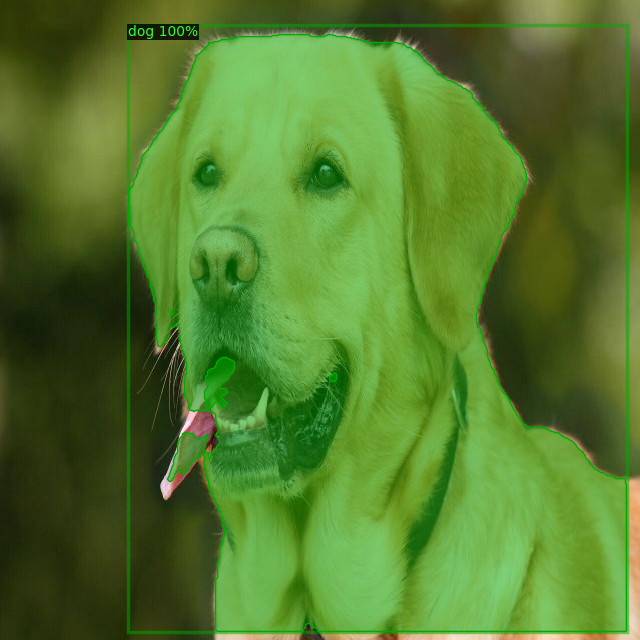

In [33]:
dataset_dicts = DatasetCatalog.get("poly_valid")
for d in random.sample(dataset_dicts, 3):
    image = cv2.imread(d["file_name"])    
    # Assuming you have already performed inference and obtained the predictions
    outputs = predictor(image)

    # Filter predictions based on confidence score
    instances = outputs["instances"]
    scores = instances.scores
    keep_indices = scores > 0.6  # Set the desired confidence threshold
    filtered_instances = instances[keep_indices]

    # Visualize the filtered predictions
    metadata = MetadataCatalog.get(predictor.cfg.DATASETS.TEST[0])  # Assuming single dataset
    v = Visualizer(image, metadata)
    v = v.draw_instance_predictions(filtered_instances.to("cpu"))
    vis_image = v.get_image()

    # Display or save the visualization
    cv2_imshow(vis_image)

WARNING [06/01 17:26:33 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[06/01 17:26:33 d2.data.datasets.coco]: Loaded 55 images in COCO format from /content/Instanse-seg-Cat-&-Dog-5/valid/_annotations.coco.json


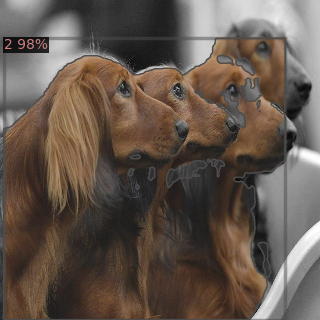

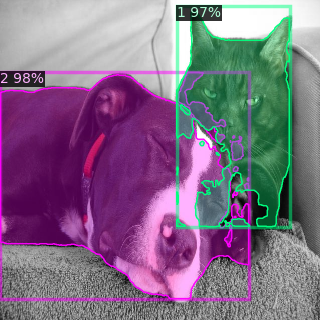

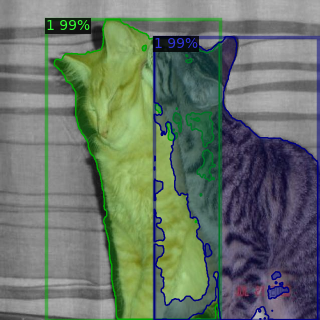

In [19]:
dataset_dicts = DatasetCatalog.get("poly_valid")
for d in random.sample(dataset_dicts, 3):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])
